In [6]:
import pydicom
import nibabel as nib
import os
import numpy as np
import dicom2nifti
from pydicom.uid import generate_uid
from nilearn import plotting


In [4]:
class Estudio:
    def __init__(self, dicompath):
        self.path= dicompath
        self.data= pydicom.dcmread(dicompath)
        self.id= self.data.SOPInstanceUID

    def anonimizarDicom(self, inputPath, outputPath):
        ds= pydicom.dcmread(inputPath)
        etiquetas = ["PatientName", "PatientID"]
        for tag in etiquetas:
            if tag in ds:
                delattr(ds, tag)
        ds.SOPInstanceUID =generate_uid()
        ds.save_as(outputPath)
        print(f"Archivo anonimizado guardado en: {outputPath}")

    @staticmethod
    def anonimizarCarpeta(inputDir, outputDir):
        # Crear la carpeta de salida si no existe
        if not os.path.exists(outputDir):
            os.makedirs(outputDir)
        
        for filename in os.listdir(inputDir):
            if filename.endswith(".dcm"):
                inputPath= os.path.join(inputDir, filename)
                outputPath= os.path.join(outputDir, filename)
                estudio= Estudio(inputPath)
                estudio.anonimizarDicom(inputPath, outputPath)

    @staticmethod
    def convertirNifti(dicomdir, niftidir):
        if not os.path.exists(niftidir):
            os.makedirs(niftidir)
        dicom2nifti.convert_directory(dicomdir, niftidir)
        print(f"Conversión completa: Los archivos NIfTI se han guardado en {niftidir}")


    def obtenerInfo(self):
            info={"ID del Estudio": self.data.StudyID,
            "Fecha": self.data.StudyDate,
                "Modalidad": self.data.Modality,
                "Descripción": self.data.StudyDescription,
                "Dimensiones": self.data.pixel_array.shape}
            return info
        

In [3]:
class Paciente:
    def __init__(self, idPaciente, nombre):
        self.idPaciente=idPaciente
        self.nombre= nombre
        self.estudios= []

    def agregarEstudio(self, estudio):
        self.estudios.append(estudio)
    

In [13]:
class SistemaGestion:
    def __init__(self):
        self.pacientes ={}

    def agregarPaciente(self, idPaciente, nombre):
        if idPaciente not in self.pacientes:
            self.pacientes[idPaciente]= Paciente(idPaciente, nombre)
            print("Paciente exitosamente agregado")
        else:
            print(f"El paciente con ID {idPaciente} ya existe.")

    def consultarPaciente(self, idPaciente):
        paciente= self.pacientes.get(idPaciente)
        if paciente:
            print(f"""Información del paciente con ID {idPaciente}: 
            Nombre: {paciente.nombre}
            ID del Paciente: {paciente.idPaciente}""")
            return paciente
        else:
            print(f"El paciente con ID {idPaciente} no existe.")
            return None

    def agregarEstudio(self, idPaciente, estudio):
        paciente= self.consultarPaciente(idPaciente)
        if paciente:
            paciente.agregarEstudio(estudio)
        else:
            print(f"El paciente con ID {idPaciente} no existe.")

    def consultarEstudios(self, idPaciente):
        paciente= self.consultarPaciente(idPaciente)
        if paciente:
            estudiosInfo=[]
            for estudio in paciente.estudios:
                estudioInfo= {
                    "ID del Estudio": estudio.id,
                    "Fecha": estudio.data.StudyDate,
                    "Modalidad": estudio.data.Modality,
                    "Descripción": estudio.data.StudyDescription,
                    "Dimensiones": estudio.data.pixel_array.shape,
                }
                estudiosInfo.append(estudioInfo)
            return estudiosInfo
        else:
            return []

    def eliminarEstudio(self, idPaciente, estudioID):
        paciente= self.consultarPaciente(idPaciente)
        if paciente:
            for estudio in paciente.estudios:
                if estudio.id == estudioID:
                    paciente.estudios.remove(estudio)
                    print(f"Estudio con ID {estudioID} eliminado para el paciente con ID {idPaciente}.")
                    break
        else:
            print(f"El paciente con ID {idPaciente} no existe.")

    def visualizarEstudio(self, niftiPath, modo='tresVistas'):
        visualizar=input("""Ingrese la forma en la que quiere visualizar la imagen 
              1. Un plano
              2. Tres planos
              3. Mosaico """)
        img=nib.load(niftiPath)
        if visualizar=='2':
            modo='tresVistas'
            plotting.plot_img(img, display_mode='ortho', title="Visualización en tres planos")            
        elif visualizar=='1':
            modo ='unaVista'
            plano=input("""¿Qué plano desea ver? 
                        a. Plano x
                        b. Plano y
                        c. Plano z""")
            if plano== 'a':
                plotting.plot_img(img,display_mode="x", title="Visualización del plano x")
            elif plano== 'b':
                plotting.plot_img(img, display_mode="y", title="Visualización del plano y")
            elif plano== 'c':
                plotting.plot_img(img, display_mode="z", title="Visualización del plano z")
            else:
                print("Plano no reconocido, ingrese una de las opciones.")
        elif visualizar=='3':
            modo ='mosaico'
            plotting.plot_epi(img, display_mode='mosaic', title="Visualización en mosaico")
        else:
            print(f"Modo de visualización no reconocido: {visualizar}")


In [7]:
sistema=SistemaGestion()
sistema.agregarPaciente(678, "Juan Pérez")

Paciente exitosamente agregado


C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


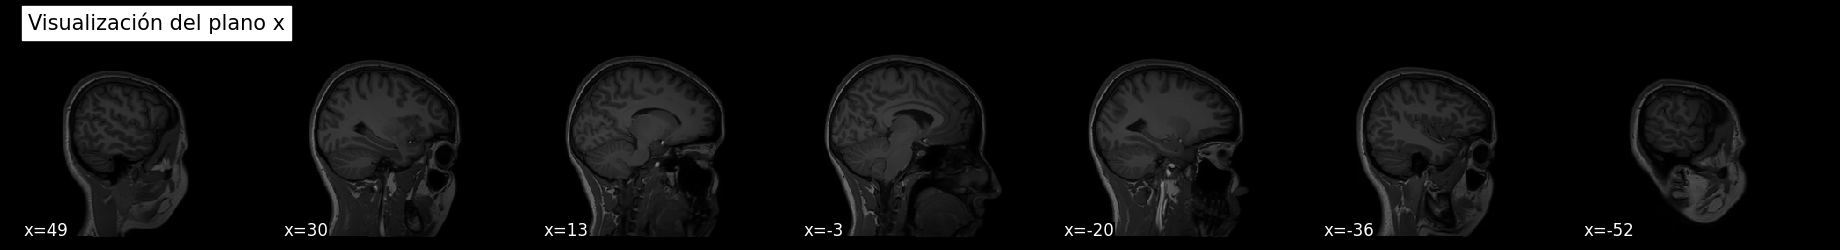

In [14]:
sistema.visualizarEstudio(r'C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti\201_sag_3d_t1_accelerated.nii.gz')

C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


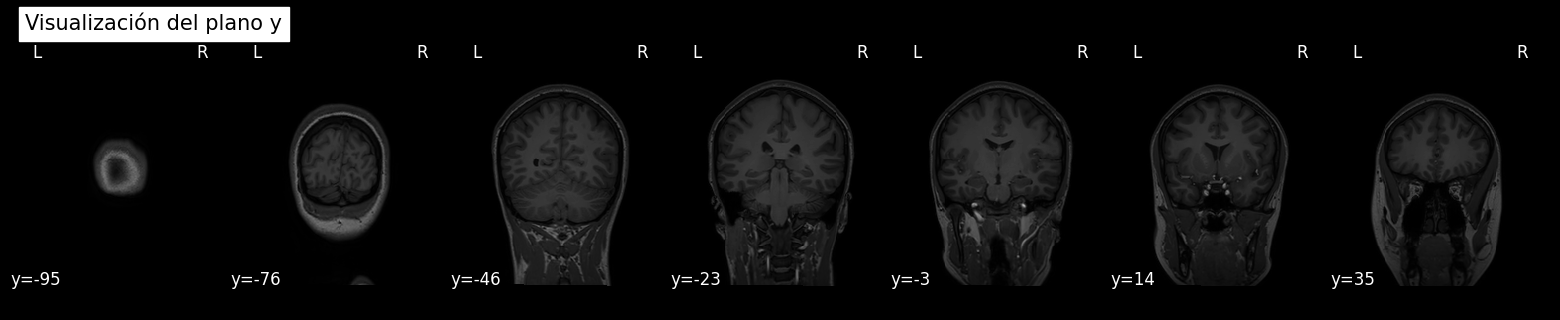

In [9]:
sistema.visualizarEstudio(r'C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti\201_sag_3d_t1_accelerated.nii.gz')

C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


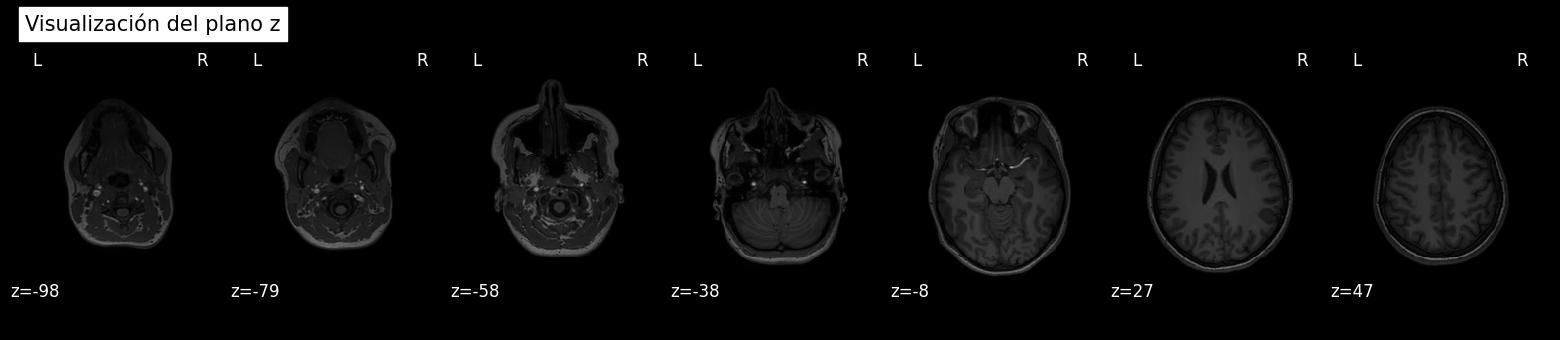

In [10]:
sistema.visualizarEstudio(r'C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti\201_sag_3d_t1_accelerated.nii.gz')

C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


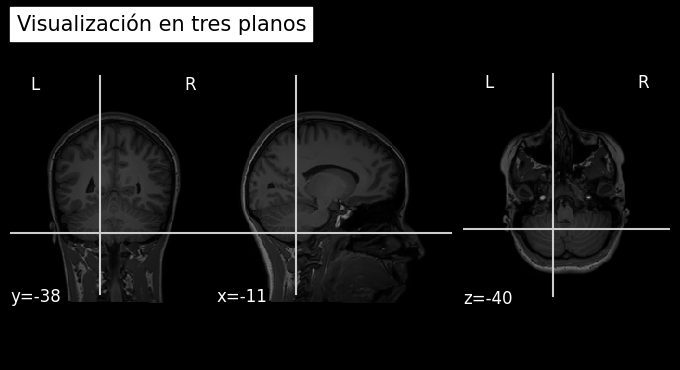

In [15]:
sistema.visualizarEstudio(r'C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti\201_sag_3d_t1_accelerated.nii.gz')

C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


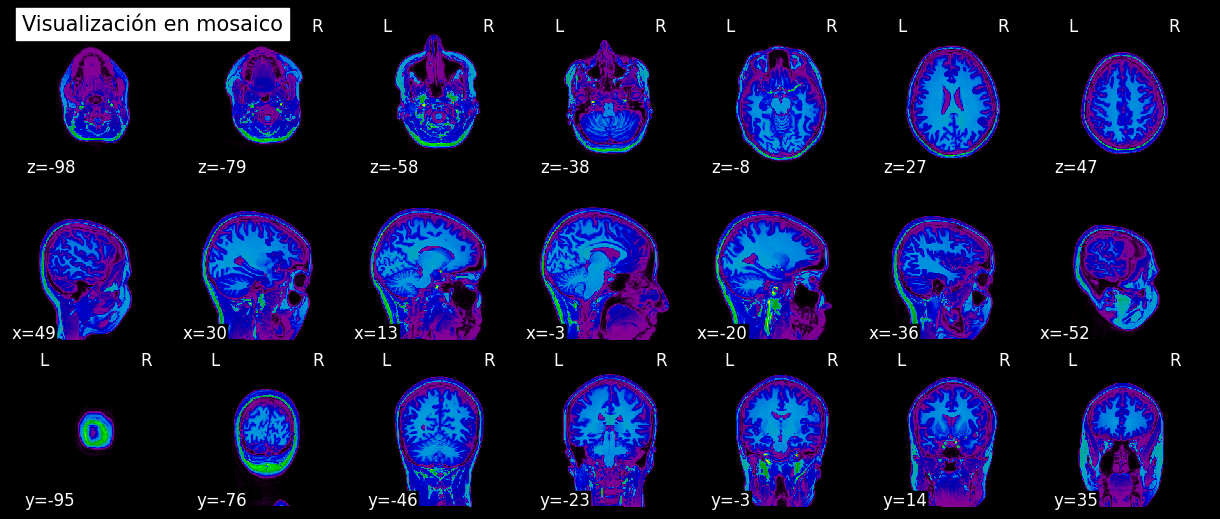

In [12]:
sistema.visualizarEstudio(r'C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti\201_sag_3d_t1_accelerated.nii.gz')

In [9]:
paciente = sistema.consultarPaciente(678)

Información del paciente con ID 678: 
            Nombre: Juan Pérez
            ID del Paciente: 678


In [10]:
estudio = Estudio(r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001\0001\IMG0181.dcm")
paciente.agregarEstudio(estudio)



In [11]:
estudiosPac = sistema.consultarEstudios(678)
print(f"Estudios del paciente {paciente.nombre}: {estudiosPac}")

Información del paciente con ID 678: 
            Nombre: Juan Pérez
            ID del Paciente: 678
Estudios del paciente Juan Pérez: [{'ID del Estudio': '1.2.826.0.1.3680043.2.1125.1.388829671786467432432755483581754', 'Fecha': '20230802', 'Modalidad': 'MR', 'Descripción': 'CEREBRO SIMPLE', 'Dimensiones': (235, 205)}]


In [12]:
sistema.eliminarEstudio(678, estudio.id)

Información del paciente con ID 678: 
            Nombre: Juan Pérez
            ID del Paciente: 678
Estudio con ID 1.2.826.0.1.3680043.2.1125.1.388829671786467432432755483581754 eliminado para el paciente con ID 678.


In [13]:
dcm_data = pydicom.dcmread(r'0001\0001\IMG0003.dcm')
dcm_data


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 258
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.73030480104979342188228655012340676
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.10.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.10'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID          

In [14]:
estudio1= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001\0001"
estudio1Anon= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon"
estudio1Nifti=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001\0001_nifti"

Estudio.anonimizarCarpeta(estudio1, estudio1Anon)
Estudio.convertirNifti(estudio1,estudio1Nifti)

Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0001.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0002.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0003.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0004.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0005.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0006.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0007.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0008.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001_anon\IMG0009.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2

In [15]:
#Crear una instancia de la clase Estudio y obtener la información
archivo= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0001\0001\IMG0151.dcm"  #especifica el archivo DICOM
estudio1= Estudio(archivo)
info= estudio1.obtenerInfo()
print(info)

{'ID del Estudio': '7255692790', 'Fecha': '20230802', 'Modalidad': 'MR', 'Descripción': 'CEREBRO SIMPLE', 'Dimensiones': (235, 205)}


In [16]:
estudio2= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002"
estudio2Anon= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon"
estudio2Nifti=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002\0002_nifti"

Estudio.anonimizarCarpeta(estudio2, estudio2Anon)
Estudio.convertirNifti(estudio2,estudio2Nifti)

Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0001.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0002.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0003.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0004.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0005.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0006.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0007.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0008.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0002_anon\IMG0009.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2

In [17]:
estudio3= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003\0003"
estudio3Anon= r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon"
estudio3Nifti=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003\0003_nifti"

Estudio.anonimizarCarpeta(estudio3, estudio3Anon)
Estudio.convertirNifti(estudio3,estudio3Nifti)

Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0001.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0002.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0003.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0004.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0005.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0006.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0007.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0008.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2\INFOII\0003_anon\IMG0009.dcm
Archivo anonimizado guardado en: C:\Users\griss\Documents\Parcial 1 Info2